### Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Data Loading

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
data = pd.read_csv('./data/housing.csv', header=None, delimiter=r"\s+", names=column_names)

### Data readme

In [4]:
print('Data Obs : {}' .format(len(data)))
print('Data Columns : {} features' .format(len(data.columns)))
print('Data Columns : {}' .format(list(data.columns)))

Data Obs : 506
Data Columns : 14 features
Data Columns : ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


### Data Head

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


***
|변수 명|변수 설명 내용|
|----|:----:|
| **CRIM** | 자치시(town) 별 1인당 범죄율| 
| **ZN**| 25,000 평방피트를 초과하는 거주지역의 비율|
| **INDUS**|비소매상업지역이 점유하고 있는 토지의 비율|
| **CHAS**| 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)|
| **NOX**| 10ppm 당 농축 일산화질소|
| **RM**| 주택 1가구당 평균 방의 개수|
| **AGE**| 1940년 이전에 건축된 소유주택의 비율|
| **DIS**| 5개의 보스턴 직업센터까지의 접근성 지수|
| **RAD**| 방사형 도로까지의 접근성 지수|
| **TAX**| 10,000 달러 당 재산세율|
| **PTRATIO**| 자치시(town)별 학생/교사 비율|
| **B**| 자치시별 흑인의 비율|
| **LSTAT**| 모집단의 하위계층의 비율(%)|
| **MEDV**| 본인 소유의 주택가격(중앙값) (단위: $1,000)|


### Find a Missing Value

In [6]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Describe

In [7]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### data Correlation

In [8]:
corr = data.corr().round(2)

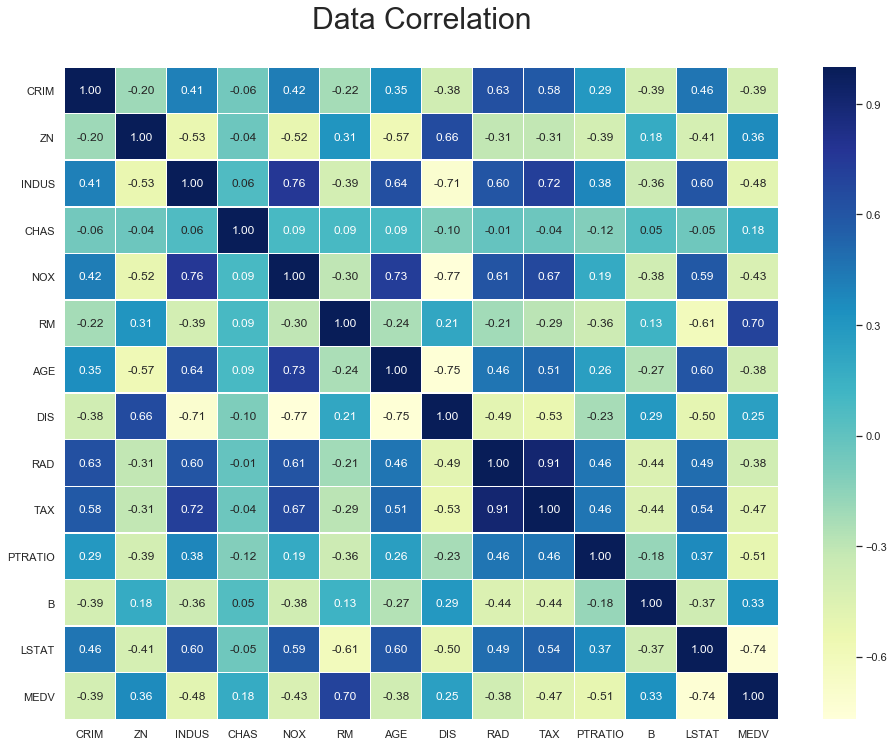

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(16,12))
plt.title("Data Correlation", fontsize=30, position=(0.5, 1.0+0.05))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=.5, ax=ax, cmap='YlGnBu')
plt.show()

시각화를 통해

1) **MEDV와 LSTAT(저소득층 주민 비율), RM(집 안의 방의 개수)**의 변수와의 상관관계가 높음을 알 수 있었다.

2) **RAD와 TAX**의 상관관계가 가장 높으며, **CHAS(찰스 강의 위치 여부)**는 어느 변수던 상관관계가 미비함을 알 수 있었다.

3) **PTRATIO(자치시 별 학생/교사 비율), LSTAT(모집단의 하위 계층 비율)**은 **MEDV**와의 음의 상관관계를 보임 즉, 자치시 별 학생/교사 비율이 크거나 하위 계층 비율이 클수록 **MEDV(본인 소유의 주택)**의 값은 낮아짐을 알 수 있다. 


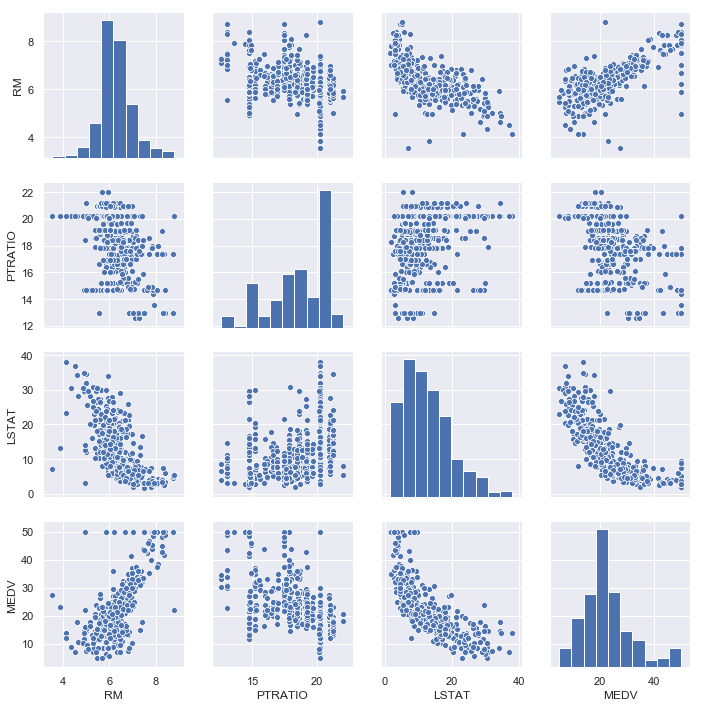

In [10]:
# 상관계수가 -0.5 이하이거나 0.5 이상인 경우

sns.pairplot(data[['RM','PTRATIO','LSTAT','MEDV']])
            

plt.show()

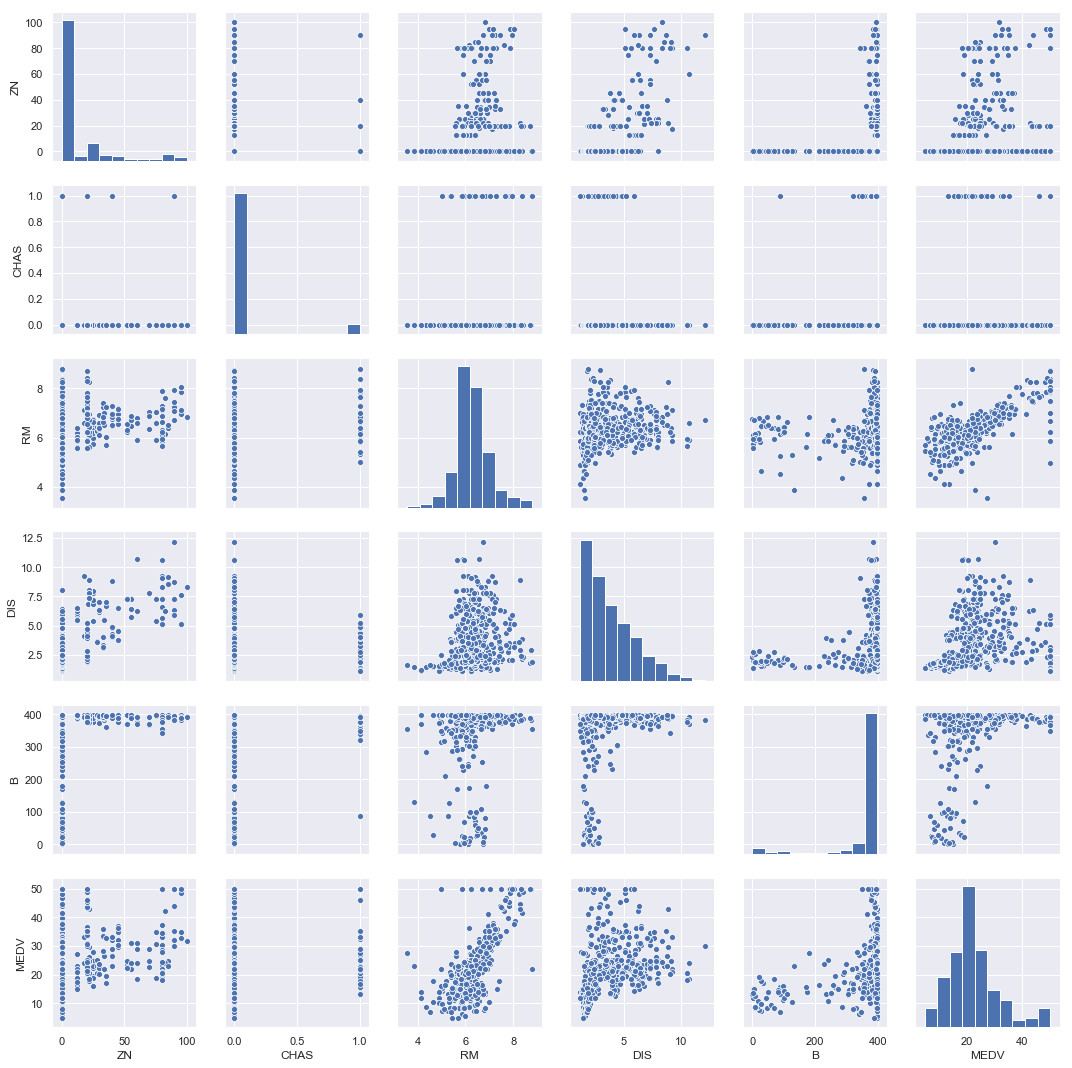

In [11]:
# MEDV와 양의 상관계수를 띄는 경우

sns.pairplot(data[['ZN','CHAS','RM','DIS','B','MEDV']])
            

plt.show()

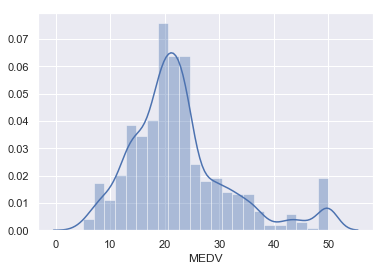

In [12]:
sns.distplot(data['MEDV'])
plt.show()

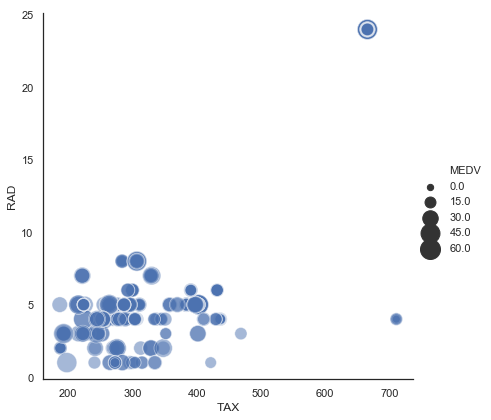

In [13]:
# RAD와 TAX의 산점도

sns.set(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="TAX", y="RAD", size="MEDV",
            sizes=(40, 400), alpha=.5, palette="cmap",
            height=6, data=data)
plt.show()

In [14]:
# 이상치를 제거한 RAD와 TAX의 상관 계수가 0.91에서 0.24까지 하락함을 알 수 있음.

data[data['TAX'] < 600].corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.292718,0.551030,0.134326,0.756747,-0.220555,0.479357,-0.457143,0.144810,0.388100,-0.234556,-0.523279,0.402699,-0.181534
ZN,-0.292718,1.000000,-0.477386,-0.060212,-0.471940,0.308619,-0.528450,0.633651,-0.171166,-0.108463,-0.295556,0.127976,-0.390839,0.320577
INDUS,0.551030,-0.477386,1.000000,0.126703,0.674646,-0.371408,0.533660,-0.596369,0.007189,0.415502,0.099695,-0.302690,0.509791,-0.360261
CHAS,0.134326,-0.060212,0.126703,1.000000,0.125781,0.043789,0.128451,-0.142665,0.086933,-0.035493,-0.142621,-0.058096,0.061360,0.091612
NOX,0.756747,-0.471940,0.674646,0.125781,1.000000,-0.263575,0.667190,-0.711938,0.130075,0.387004,-0.168046,-0.410883,0.492296,-0.250309
RM,-0.220555,0.308619,-0.371408,0.043789,-0.263575,1.000000,-0.162839,0.088672,0.067212,-0.227039,-0.334022,0.155154,-0.677851,0.889269
AGE,0.479357,-0.528450,0.533660,0.128451,0.667190,-0.162839,1.000000,-0.672493,0.101417,0.241146,0.045925,-0.221078,0.540045,-0.250720
DIS,-0.457143,0.633651,-0.596369,-0.142665,-0.711938,0.088672,-0.672493,1.000000,-0.087367,-0.208469,0.019900,0.202948,-0.348329,0.049400
RAD,0.144810,-0.171166,0.007189,0.086933,0.130075,0.067212,0.101417,-0.087367,1.000000,0.249757,-0.054362,-0.059954,0.005308,0.070698
TAX,0.388100,-0.108463,0.415502,-0.035493,0.387004,-0.227039,0.241146,-0.208469,0.249757,1.000000,0.001881,-0.255032,0.252450,-0.292318


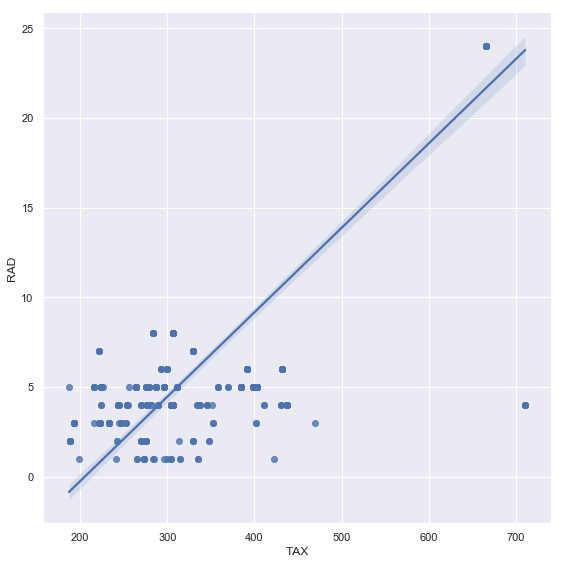

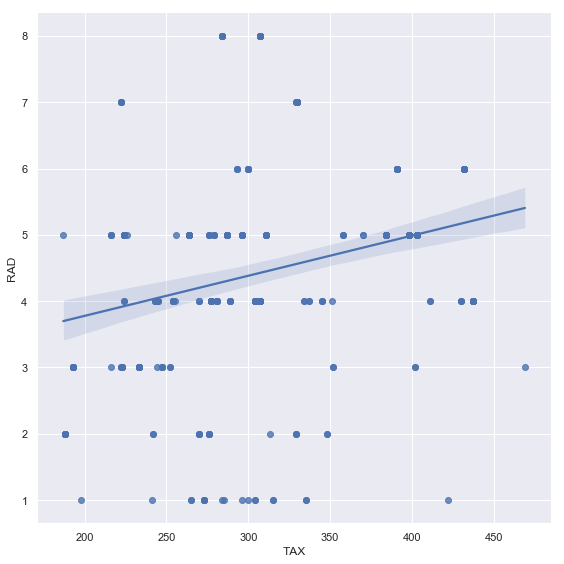

In [15]:
import seaborn as sns
sns.set()

# Plot sepal with as a function of sepal_length across days
sns.lmplot(x="TAX", y="RAD",truncate=True, height=8, data=data)
sns.lmplot(x="TAX", y="RAD",truncate=True, height=8, data=data[data['TAX'] < 600])



plt.show()

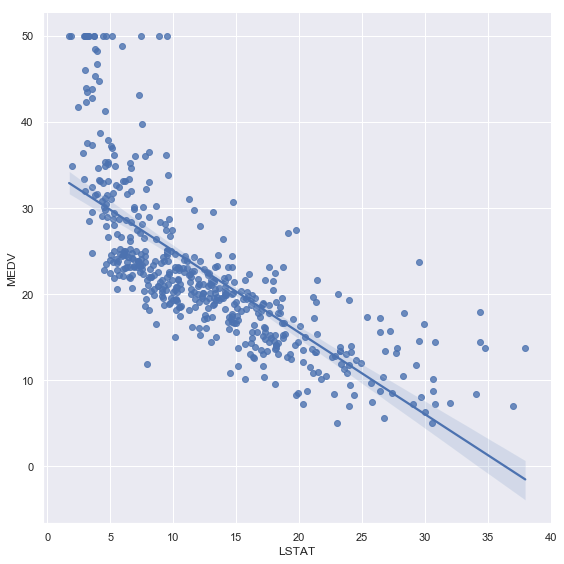

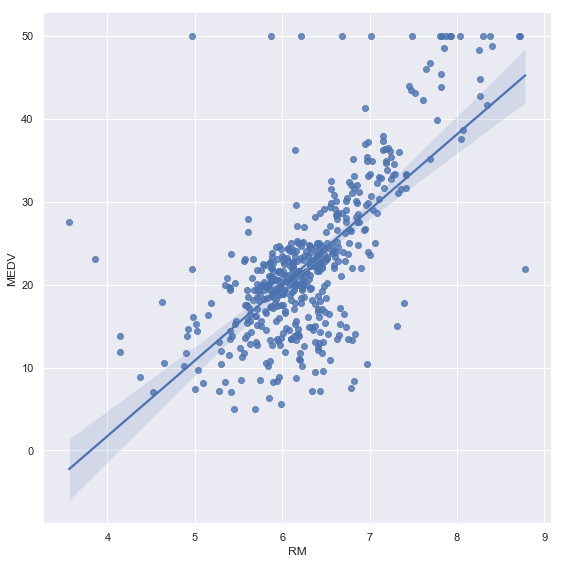

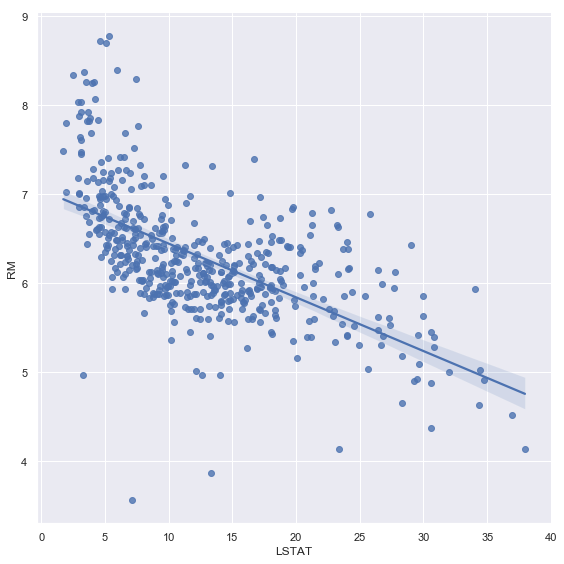

In [16]:
import seaborn as sns
sns.set()

# Plot sepal with as a function of sepal_length across days
sns.lmplot(x="LSTAT", y="MEDV",truncate=True, height=8, data=data)
sns.lmplot(x="RM", y="MEDV",truncate=True, height=8, data=data)
sns.lmplot(x="LSTAT", y="RM",truncate=True, height=8, data=data)


plt.show()

방의 개수에 따라서 집값은 상승하는 추세를 보이며 저소득층 주민비율이 높을수록 방의개수, 집값은 모두 떨어지는 경향을 보였다.

따라서 방의 개수와 저소득층 주민비율을 가지고 단순 회귀분석을 통한 예측을 하고자 함.

In [17]:
new_data=data[data['RM'] > 3].round()

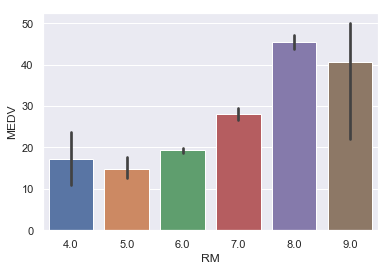

In [18]:
sns.barplot(x='RM', y='MEDV', data=new_data)

plt.show()

# Linear Regression Model

MEDV와의 상관계수가 -0.5 이하이거나 0.5 이상인 변수들(**LSTAT,PTRATIO,RM**)로 MEDV와의 선형 회귀를 구해보고자 한다.

In [19]:
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

In [20]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [21]:
prices.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [22]:
mean_price = np.mean(prices)
mean_price

22.532806324110698

In [23]:
min_price = np.min(prices)
min_price

5.0

In [24]:
max_price = np.max(prices)
max_price

50.0

In [54]:
X = pd.DataFrame(np.c_[data['LSTAT'], data['RM'],data['PTRATIO']], columns = ['LSTAT','RM','PTRATIO'])
Y = data['MEDV']

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 3)
(102, 3)
(404,)
(102,)


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
# model evaluation for training set
from sklearn.metrics import r2_score
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.303863193307931
R2 score is 0.6725214335656511


The model performance for testing set
--------------------------------------
RMSE is 4.913937534764083
R2 score is 0.6915878280744171


**RMSE** : 추정 값 또는 모델이 예측한 값과 실제 환경에서 관찰되는 값의 차이를 다룰 때 흔히 사용하는 측도

**R2** : 결정계수는 추정한 선형 모형이 주어진 자료에 적합한 정도를 재는 척도 

#### 앞으로 해야할 일

rmse 줄이고 r2 올리기

다른 모델도 사용하기

시각화 할 만한 변수 찾기

변수 조작하는 법 공부 한 후 실행하기

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

In [60]:
clf = svm.SVC(kernel='linear', C=3
).fit(X_train, Y_train)
clf.score(X_test, Y_test)

ValueError: Unknown label type: 'continuous'